[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Srivastava_1982/figures.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Srivastava_1982/figures.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Srivastava_1982/figures.ipynb)

TODO #1417

In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [5]:
from matplotlib import pyplot
import numpy as np
from PySDM_examples.Srivastava_1982.equations import Equations
from open_atmos_jupyter_utils import show_plot

## Figure 1

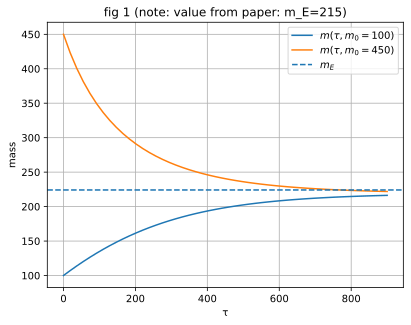

HTML(value="<a href='./fig1.pdf' target='_blank'>./fig1.pdf</a><br>")

In [3]:
alpha_star = 1e-5
beta_star = 1e-4

pyplot.title("fig 1 (note: value from paper: m_E=215)")
for m0 in (100, 450):
    eqs = Equations(alpha_star=alpha_star, beta_star=beta_star)
    tau = np.linspace(0, 900)
    y0 = eqs.eq15(m0)
    x = eqs.eq16(tau)
    y = (y0 + np.tanh(x)) / (1 + y0 * np.tanh(x))
    pyplot.plot(tau, eqs.eq15_m_of_y(y), label=f"$m(τ, m_0={m0})$")

pyplot.axhline(eqs.eq12(), linestyle="--", label="$m_E$")
pyplot.xlabel("τ")
pyplot.ylabel("mass")
pyplot.grid()
pyplot.legend()
show_plot('fig1.pdf')

## coalescence (equation 13) and breakup (equation 14) analytic

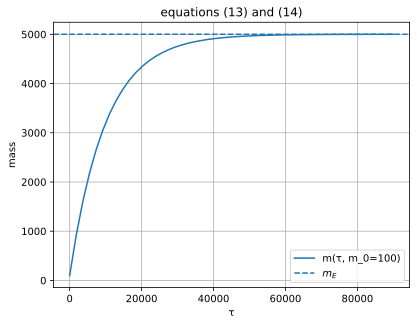

<Figure size 640x480 with 0 Axes>

HTML(value="<a href='./eq_13_14.pdf' target='_blank'>./eq_13_14.pdf</a><br>")

In [4]:
alpha_star = 1e-5
beta_star = 1e-4
eqs = Equations(alpha_star=alpha_star, beta_star=beta_star)

tau = np.linspace(0, 90000)
m0 = 100
pyplot.title("equations (13) and (14)")
pyplot.plot(tau, eqs.eq13(m0, tau), label=f"m(τ, m_0={m0})")
pyplot.axhline(eqs.eq14(), linestyle="--", label="$m_E$")
pyplot.xlabel("τ")
pyplot.ylabel("mass")
pyplot.grid()
pyplot.legend()
pyplot.show()
show_plot('eq_13_14.pdf')